In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI

In [2]:
load_dotenv()

True

In [6]:
def create_llm():
    api_key=os.getenv("GOOGlE_API_KEY")
    llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                               api_key=api_key)
    
    return llm

In [7]:
model=create_llm()

In [9]:
model.invoke("Hello, my name is LangGraph. What is your name?").content

"I don't have a name.  I am a large language model, trained by Google."

In [10]:
class BlogGenerator(TypedDict):

    topic:str
    outline:str
    blog:str

In [19]:
def outline_generator(state:BlogGenerator,model=model)->BlogGenerator:
    
    prompt=f"Create a outline for a blog on the topic: {state['topic']}"
    outline=model.invoke(prompt).content
    state['outline']=outline
    return state

In [20]:
def blog_generator(state:BlogGenerator)->BlogGenerator:

    prompt=f"Generate a detailed blog based on the topic and outline generated.\n topic:{state['topic']} \n outline:{state['outline']}"

    blog=model.invoke(prompt).content

    state['blog']=blog

    return state

In [21]:
graph=StateGraph(BlogGenerator)

graph.add_node("Outline Generator",outline_generator)
graph.add_node("bloggenerator",blog_generator)

graph.add_edge(START,"Outline Generator")
graph.add_edge("Outline Generator","bloggenerator")
graph.add_edge("bloggenerator",END)

workflow=graph.compile()

In [22]:
initial_state={"topic":"The future of AI in healthcare"}

result=workflow.invoke(initial_state)

print(result['blog'])

## The Future of AI in Healthcare: A Revolution in Progress

**I. Introduction**

The World Health Organization estimates that over half the world's population lacks access to essential healthcare services.  This staggering statistic highlights a critical need for innovative solutions, and artificial intelligence (AI) is emerging as a powerful force to address this challenge.  AI, encompassing machine learning, deep learning, and natural language processing, is rapidly transforming healthcare, offering the potential to improve diagnostics, personalize treatments, and streamline operations.  This blog post will explore the exciting possibilities and significant challenges of AI in healthcare, examining its transformative potential while acknowledging the ethical considerations that must guide its development and deployment.


**II. AI-Powered Diagnostics and Treatment**

**A. Early Disease Detection:** AI is revolutionizing early disease detection through its ability to analyze medical 

In [24]:
print(result['outline'])

## Blog Outline: The Future of AI in Healthcare

**I. Introduction (approx. 100 words)**

* Hook: Start with a compelling statistic or anecdote showcasing AI's current impact or potential in healthcare.
* Briefly define AI and its relevance to healthcare.
* Thesis statement:  Preview the key areas where AI will revolutionize healthcare in the future, highlighting both the opportunities and challenges.  (e.g., "AI is poised to transform healthcare in the coming years, offering unprecedented opportunities for improved diagnostics, personalized treatments, and streamlined operations, but also presenting ethical and practical challenges that must be addressed.")

**II. AI-Powered Diagnostics and Treatment (approx. 300 words)**

* **A. Early Disease Detection:**
    * Discuss AI's role in analyzing medical images (X-rays, CT scans, MRIs) for early detection of cancer, heart disease, etc.
    * Mention specific examples of AI-powered diagnostic tools already in use or under development.
    

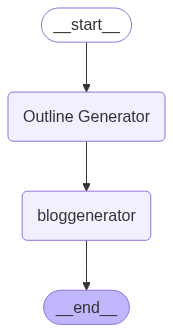

In [15]:
from IPython.display import Image, display

try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass